In [7]:
import glob
import os

# Use raw string (r'...') or forward slashes for Windows compatibility
csv_dir = r''  # Relative path; update to full path if needed
csvfiles = sorted(glob.glob(os.path.join(csv_dir, '*.csv')))

# Check collected files
for file in csvfiles:
    print(file)

10.hand.0.joker.csv
10.hand.1.joker.csv
10.hand.2.joker.csv
10.hand.3.joker.csv
13.hand.2.joker.csv
13.hand.3.joker.csv


                 Configuration  MinScore_Zero_Count
0             10 card\n0 joker                  589
1             10 card\n1 joker                 1156
2             10 card\n2 joker                 2166
3             10 card\n3 joker                 3482
4  13 card\n2 joker\n(no drop)                  777
5  13 card\n3 joker\n(no drop)                 1000


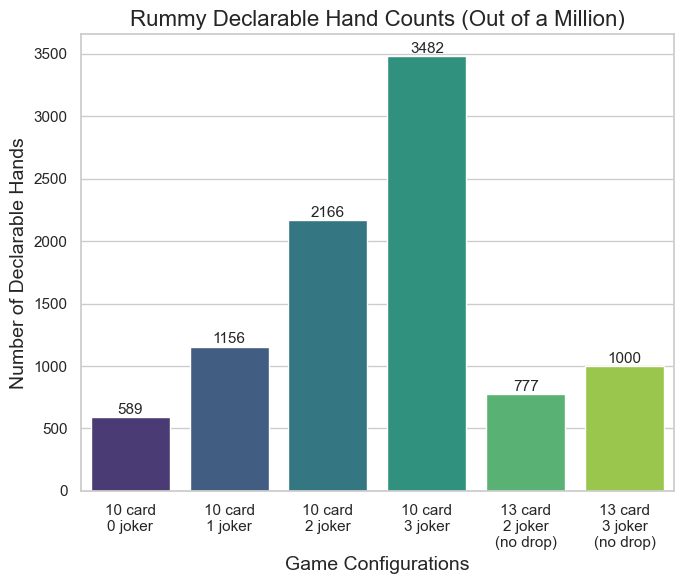

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


readable_labels = [
    '10 card\n0 joker',
    '10 card\n1 joker',
    '10 card\n2 joker',
    '10 card\n3 joker',
    '13 card\n2 joker\n(no drop)',
    '13 card\n3 joker\n(no drop)'
]


# Extract data
data = []
shirsa_count = [582,1087,2083,3297,775,982]
i=0
for csv in csvfiles:
    result = pd.read_csv(csv)
    label = readable_labels[i]
    count = (result['minscore'] == 0).sum()
    data.append({'Configuration': label, 'MinScore_Zero_Count': round((count+shirsa_count[i])/2)})
    i+=1

df = pd.DataFrame(data)

print(df)

# Plot
plt.figure(figsize=(7, 6))
sns.set(style="whitegrid")
ax = sns.barplot(
    data=df,
    x='Configuration',
    y='MinScore_Zero_Count',
    hue='Configuration',
    palette='viridis'
)

for i, row in df.iterrows():
    ax.text(i, row['MinScore_Zero_Count'] + 0.5, str(row['MinScore_Zero_Count']), 
            ha='center', va='bottom', fontsize=11)

# Aesthetics
plt.title('Rummy Declarable Hand Counts (Out of a Million)', fontsize=16)
plt.xlabel('Game Configurations', fontsize=14)
plt.ylabel('Number of Declarable Hands', fontsize=14)
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()